<a href="https://colab.research.google.com/github/anjanasa13/B2B-couriers-charges-analysis/blob/main/B2B_courier_charges_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM
*The analysis of B2B courier charges accuracy centers on evaluating the precision of fees imposed by courier companies for the transportation of goods in Business-to-Business (B2B) transactions. The objective is to verify that companies are invoiced accurately for the services rendered by courier companies.*



ABC Company, an e-commerce platform, manages a substantial volume of daily orders. To fulfill these orders, ABC collaborates with various courier companies in India, which determine charges based on the weight of the products and the distance between ABC's warehouse and the customer's delivery address. ABC's objective is to verify the accuracy of the fees billed by the courier companies for each individual order. ABC wants to analyze the accuracy of the fees charged by the courier company.



Let's commence this task by bringing in the essential Python libraries and importing the dataset.

In [1]:
from google.colab import files
uploaded = files.upload()


Saving pincodes.csv to pincodes.csv
Saving SKU Master (1).csv to SKU Master (1).csv
Saving Order Report.csv to Order Report.csv
Saving Invoice.csv to Invoice.csv
Saving Courier Company - Rates.csv to Courier Company - Rates.csv


In [2]:
import pandas as pd

order_report = pd.read_csv('/content/Order Report.csv')
sku_master = pd.read_csv('/content/SKU Master (1).csv')
pincode_mapping = pd.read_csv('/content/pincodes.csv')
courier_invoice = pd.read_csv('/content/Invoice.csv')
courier_company_rates = pd.read_csv('/content/Courier Company - Rates.csv')

print("Order Report:")
print(order_report.head())
print("\nSKU Master:")
print(sku_master.head())
print("\nPincode Mapping:")
print(pincode_mapping.head())
print("\nCourier Invoice:")
print(courier_invoice.head())
print("\nCourier Company rates:")
print(courier_company_rates.head())

Order Report:
   ExternOrderNo            SKU  Order Qty  Unnamed: 3  Unnamed: 4
0     2001827036  8904223818706        1.0         NaN         NaN
1     2001827036  8904223819093        1.0         NaN         NaN
2     2001827036  8904223819109        1.0         NaN         NaN
3     2001827036  8904223818430        1.0         NaN         NaN
4     2001827036  8904223819277        1.0         NaN         NaN

SKU Master:
             SKU  Weight (g)  Unnamed: 2  Unnamed: 3  Unnamed: 4
0  8904223815682         210         NaN         NaN         NaN
1  8904223815859         165         NaN         NaN         NaN
2  8904223815866         113         NaN         NaN         NaN
3  8904223815873          65         NaN         NaN         NaN
4  8904223816214         120         NaN         NaN         NaN

Pincode Mapping:
   Warehouse Pincode  Customer Pincode Zone  Unnamed: 3  Unnamed: 4
0             121003            507101    d         NaN         NaN
1             121003       

In [3]:
# Check for missing values
print("\nMissing values in Website Order Report:")
print(order_report.isnull().sum())
print("\nMissing values in SKU Master:")
print(sku_master.isnull().sum())
print("\nMissing values in Pincode Mapping:")
print(pincode_mapping.isnull().sum())
print("\nMissing values in Courier Invoice:")
print(courier_invoice.isnull().sum())
print("\nMissing values in courier company rates:")
print(courier_company_rates.isnull().sum())


Missing values in Website Order Report:
ExternOrderNo      0
SKU                0
Order Qty          0
Unnamed: 3       400
Unnamed: 4       400
dtype: int64

Missing values in SKU Master:
SKU            0
Weight (g)     0
Unnamed: 2    66
Unnamed: 3    66
Unnamed: 4    66
dtype: int64

Missing values in Pincode Mapping:
Warehouse Pincode      0
Customer Pincode       0
Zone                   0
Unnamed: 3           124
Unnamed: 4           124
dtype: int64

Missing values in Courier Invoice:
AWB Code                0
Order ID                0
Charged Weight          0
Warehouse Pincode       0
Customer Pincode        0
Zone                    0
Type of Shipment        0
Billing Amount (Rs.)    0
dtype: int64

Missing values in courier company rates:
fwd_a_fixed         0
fwd_a_additional    0
fwd_b_fixed         0
fwd_b_additional    0
fwd_c_fixed         0
fwd_c_additional    0
fwd_d_fixed         0
fwd_d_additional    0
fwd_e_fixed         0
fwd_e_additional    0
rto_a_fixed        

In [4]:
# Remove unnamed columns from the Website Order Report DataFrame
columns_to_drop = ['Unnamed: 3', 'Unnamed: 4']
order_report = order_report.drop(columns=columns_to_drop, errors='ignore')

# Remove unnamed columns from the SKU Master DataFrame
columns_to_drop_sku = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
sku_master = sku_master.drop(columns=columns_to_drop_sku, errors='ignore')

# Remove unnamed columns from the Pincode Mapping DataFrame
columns_to_drop_pincode = ['Unnamed: 3', 'Unnamed: 4']
pincode_mapping = pincode_mapping.drop(columns=columns_to_drop_pincode, errors='ignore')

Merge the Order Report and SKU Master datasets based on the common SKU column

In [5]:
# Merge the Order Report and SKU Master based on SKU
merged_data = pd.merge(order_report, sku_master, on='SKU')
print(merged_data.head())

   ExternOrderNo            SKU  Order Qty  Weight (g)
0     2001827036  8904223818706        1.0         127
1     2001821995  8904223818706        1.0         127
2     2001819252  8904223818706        1.0         127
3     2001816996  8904223818706        1.0         127
4     2001814580  8904223818706        1.0         127


In [6]:
# Rename the "ExternOrderNo" column to "Order ID" in the merged_data DataFrame
merged_data = merged_data.rename(columns={'ExternOrderNo': 'Order ID'})

Merge the courier invoice and pincode mapping dataset

In [7]:
abc_courier = pincode_mapping.drop_duplicates(subset=['Customer Pincode'])
courier_abc= courier_invoice[['Order ID', 'Customer Pincode','Type of Shipment']]
pincodes= courier_abc.merge(abc_courier,on='Customer Pincode')
print(pincodes.head())

     Order ID  Customer Pincode Type of Shipment  Warehouse Pincode Zone
0  2001806232            507101  Forward charges             121003    d
1  2001806273            486886  Forward charges             121003    d
2  2001806408            532484  Forward charges             121003    d
3  2001806458            143001  Forward charges             121003    b
4  2001807012            515591  Forward charges             121003    d


Initially, we identify unique customer pin codes from the pincode mapping dataset and create a new DataFrame named "abc_courier" to store this information.

Specific columns ("Order ID," "Customer Pincode," "Type of Shipment") are selected from the courier_invoice dataset, and a new DataFrame called "courier_abc" is created to store this subset of data.

We proceed to merge the 'courier_abc' DataFrame with the 'abc_courier' DataFrame based on the 'Customer Pincode' column. This merging operation associates customer pin codes with their respective orders and shipping types, resulting in a DataFrame named 'pincodes.'

Now, the next step involves merging the pin codes with the main dataframe.

Next, determine the weight in kilograms by dividing the values in the 'Weight (g)' column within the 'merged2' DataFrame by 1000.

In [8]:
merged2 = merged_data.merge(pincodes, on='Order ID')
merged2['Weights (Kgs)'] = merged2['Weight (g)'] / 1000

The weight_slab() function is designed to determine the weight slab based on the shipment weight. It takes the input weight and employs specific conditions to calculate the corresponding weight slab. Here's how the function operates:

Initially, the function computes the remainder of the weight divided by 1 and rounds it to one decimal place. If the remainder is 0.0, it indicates that the weight is a multiple of 1 KG, and the function returns the weight as it is.

If the remainder is greater than 0.5, it signifies that the weight surpasses the next half-KG slab. In such cases, the function rounds the weight to the nearest integer and adds 1.0 to it, representing the next heavier slab.

If the remainder is less than or equal to 0.5, it implies that the weight falls within the current half-KG bracket. The function then rounds the weight to the nearest integer and adds 0.5 to it, representing the current weight slab.

In [9]:
def weight_slab(weight):
    i = round(weight % 1, 1)
    if i == 0.0:
        return weight
    elif i > 0.5:
        return int(weight) + 1.0
    else:
        return int(weight) + 0.5

merged2['Weight Slab (KG)'] = merged2['Weights (Kgs)'].apply(weight_slab)
courier_invoice['Weight Slab Charged by Courier Company']=(courier_invoice['Charged Weight']).apply(weight_slab)

Renaming columns

In [10]:
courier_invoice = courier_invoice.rename(columns={'Zone': 'Delivery Zone Charged by Courier Company'})
merged2 = merged2.rename(columns={'Zone': 'Delivery Zone As Per ABC'})
merged2 = merged2.rename(columns={'Weight Slab (KG)': 'Weight Slab As Per ABC'})

**Calculating the expected charges**

The following explanation outlines the functionality of the provided code:

In this code snippet, we iterate through each row of the 'merged2' DataFrame to compute the anticipated charges based on ABC's tariff structure. The required rates and parameters, such as fixed charges and surcharges per weight tier for both forward and RTO shipments, are retrieved based on the delivery area.

Next, we ascertain the weight slab for each row. If the shipment type is 'Forward Charges,' we calculate the additional weight beyond the basic weight slab (0.5 KG) and apply the corresponding extra charges. For shipments with "Forward and RTO Charges," we take into account additional charges for the terminal and RTO components.

Ultimately, the calculated expected charges are stored in the "Expected charges according to ABC" column of the "merged2" DataFrame. This facilitates a comparison between the expected charges and the billed charges, enabling an analysis of the accuracy of the courier company's pricing.

In [11]:
total_expected_charge = []

for _, row in merged2.iterrows():
    fwd_category = 'fwd_' + row['Delivery Zone As Per ABC']
    fwd_fixed = courier_company_rates.at[0, fwd_category + '_fixed']
    fwd_additional = courier_company_rates.at[0, fwd_category + '_additional']
    rto_category = 'rto_' + row['Delivery Zone As Per ABC']
    rto_fixed = courier_company_rates.at[0, rto_category + '_fixed']
    rto_additional = courier_company_rates.at[0, rto_category + '_additional']

    weight_slab = row['Weight Slab As Per ABC']

    if row['Type of Shipment'] == 'Forward charges':
        additional_weight = max(0, (weight_slab - 0.5) / 0.5)
        total_expected_charge.append(fwd_fixed + additional_weight * fwd_additional)
    elif row['Type of Shipment'] == 'Forward and RTO charges':
        additional_weight = max(0, (weight_slab - 0.5) / 0.5)
        total_expected_charge.append(fwd_fixed + additional_weight * (fwd_additional + rto_additional))
    else:
        total_expected_charge.append(0)

merged2['Expected Charge as per ABC'] = total_expected_charge
print(merged2.head())

     Order ID            SKU  Order Qty  Weight (g)  Customer Pincode  \
0  2001827036  8904223818706        1.0         127            173213   
1  2001827036  8904223819093        1.0         150            173213   
2  2001827036  8904223819109        1.0         100            173213   
3  2001827036  8904223818430        1.0         165            173213   
4  2001827036  8904223819277        1.0         350            173213   

  Type of Shipment  Warehouse Pincode Delivery Zone As Per ABC  Weights (Kgs)  \
0  Forward charges             121003                        e          0.127   
1  Forward charges             121003                        e          0.150   
2  Forward charges             121003                        e          0.100   
3  Forward charges             121003                        e          0.165   
4  Forward charges             121003                        e          0.350   

   Weight Slab As Per ABC  Expected Charge as per ABC  
0                 

To conclude the process, the code proceeds to merge the DataFrame with the courier invoice, resulting in the display of the final DataFrame.

In [12]:
merged_output = merged2.merge(courier_invoice, on='Order ID')
print(merged_output.head())

     Order ID            SKU  Order Qty  Weight (g)  Customer Pincode_x  \
0  2001827036  8904223818706        1.0         127              173213   
1  2001827036  8904223819093        1.0         150              173213   
2  2001827036  8904223819109        1.0         100              173213   
3  2001827036  8904223818430        1.0         165              173213   
4  2001827036  8904223819277        1.0         350              173213   

  Type of Shipment_x  Warehouse Pincode_x Delivery Zone As Per ABC  \
0    Forward charges               121003                        e   
1    Forward charges               121003                        e   
2    Forward charges               121003                        e   
3    Forward charges               121003                        e   
4    Forward charges               121003                        e   

   Weights (Kgs)  Weight Slab As Per ABC  Expected Charge as per ABC  \
0          0.127                     0.5                

calculating the differences in charges and expected charges for each order.

In [13]:
df_diff = merged_output
df_diff['Difference (Rs.)'] = df_diff['Billing Amount (Rs.)'] - df_diff['Expected Charge as per ABC']

df_new = df_diff[['Order ID', 'Difference (Rs.)', 'Expected Charge as per ABC']]

print(df_new.head())

     Order ID  Difference (Rs.)  Expected Charge as per ABC
0  2001827036              61.3                        56.6
1  2001827036              61.3                        56.6
2  2001827036              61.3                        56.6
3  2001827036              61.3                        56.6
4  2001827036              61.3                        56.6


summarizing the accuracy of B2B courier charges based on the charged prices and expected prices.

In [20]:
# Calculate the total orders in each category
total_correctly_charged = len(df_new[df_new['Difference (Rs.)'] == 0])
total_overcharged = len(df_new[df_new['Difference (Rs.)'] > 0])
total_undercharged = len(df_new[df_new['Difference (Rs.)'] < 0])

# Calculate the total amount in each category
amount_overcharged = abs(df_new[df_new['Difference (Rs.)'] > 0]['Difference (Rs.)'].sum())
amount_undercharged = df_new[df_new['Difference (Rs.)'] < 0]['Difference (Rs.)'].sum()
amount_correctly_charged = df_new[df_new['Difference (Rs.)'] == 0]['Expected Charge as per ABC'].sum()

# Create a new DataFrame for the summary
summary_data = {'Description': ['Total Orders where ABC has been correctly charged',
                                'Total Orders where ABC has been overcharged',
                                'Total Orders where ABC has been undercharged'],
                'Count': [total_correctly_charged, total_overcharged, total_undercharged],
                'Amount (Rs.)': [amount_correctly_charged, amount_overcharged, amount_undercharged]}

df_summary = pd.DataFrame(summary_data)

print(df_summary)

                                         Description  Count  Amount (Rs.)
0  Total Orders where ABC has been correctly charged     12         507.6
1        Total Orders where ABC has been overcharged    382       33750.5
2       Total Orders where ABC has been undercharged      7        -165.2


<ipython-input-17-1effa118c845>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




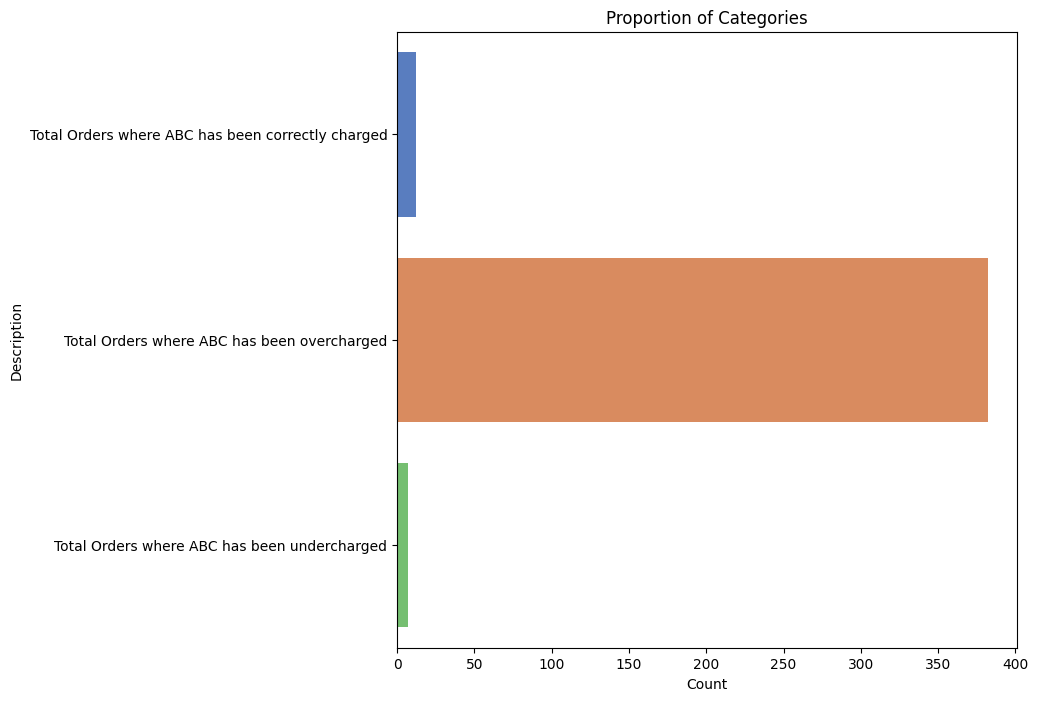

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(8, 8))  # Adjust the figure size as
sns.barplot(data=df_summary, x='Count', y='Description', palette='muted')

plt.title('Proportion of Categories')
plt.xlabel('Count')
plt.ylabel('Description')

plt.show()



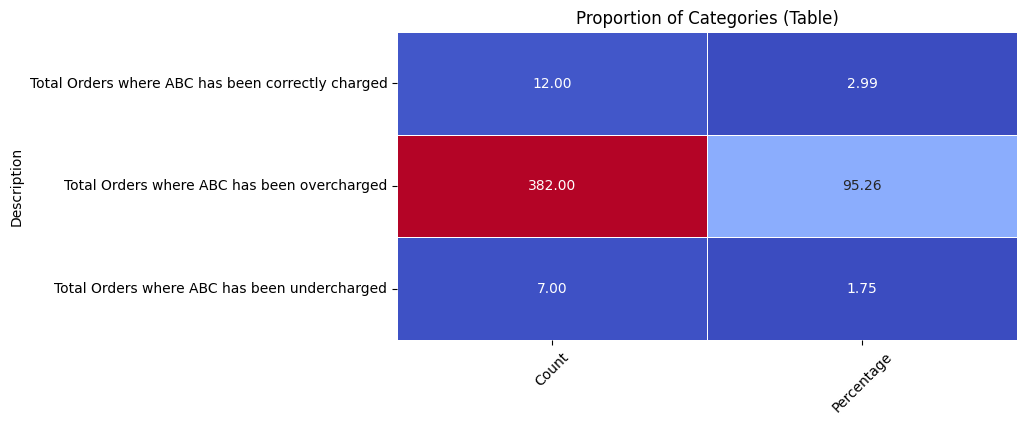

In [22]:



summary_data = pd.DataFrame({
    'Description': df_summary['Description'],
    'Count': df_summary['Count'],
    'Percentage': df_summary['Percentage'].round(2)
})

plt.figure(figsize=(8, 4))  # Adjust the figure size as needed


sns.heatmap(summary_data[['Description', 'Count', 'Percentage']].set_index('Description'),
            annot=True, fmt='.2f', cmap='coolwarm', cbar=False, linewidths=0.5)

plt.title('Proportion of Categories (Table)')
plt.xticks(rotation=45)

plt.show()


It is evident from the analysis that, **95.26% of the orders are overcharged by the courier company.**

Given the analysis indicating that 95.26% of orders are overcharged by the courier company, ABC Company may consider implementing the** following solutions:**

**Negotiate Tariffs:** Engage in discussions with the courier companies to renegotiate the tariff structure. Negotiating for more favorable rates based on the order volume or exploring alternative pricing models could lead to reduced costs.

**Implement Automated Auditing:** Introduce an automated auditing system to cross-verify charges against the agreed-upon tariffs and contractual terms. Automation can help identify discrepancies more efficiently and in real-time, minimizing the chances of overcharging.

**Regularly Review Contracts:** Periodically review and update contracts with courier companies to ensure they accurately reflect the agreed-upon terms. This includes verifying the weight and distance parameters used for calculating charges.

**Utilize Technology for Tracking:** Leverage technology to implement robust order tracking systems. Accurate tracking can help validate distance calculations and provide evidence in case of disputes over delivery locations.

**Explore Multiple Courier Partners:** Diversify courier partnerships to introduce competition. This could encourage competitive pricing among courier companies vying for ABC's business, potentially leading to more reasonable charges.

**Establish Clear Communication Channels:** Maintain open communication channels with courier partners to promptly address any concerns or discrepancies. Clear communication can lead to quicker resolution of billing issues.

**Implement a Dispute Resolution Mechanism:** Establish a structured dispute resolution mechanism in contracts. This ensures a systematic process for addressing billing discrepancies and resolving conflicts in a timely manner.

**Customer Feedback and Refunds: **Encourage customers to provide feedback on delivery charges. In cases where overcharging is identified post-delivery, consider issuing refunds or credits to affected customers to maintain trust and satisfaction.

**Benchmarking against Industry Standards:** Benchmark courier charges against industry standards to ensure that ABC is receiving competitive and fair pricing. This can provide insights into market norms and help in negotiations.

**Legal Consultation:** If disputes persist, seek legal advice to understand the contractual obligations and explore legal avenues to resolve overcharging issues.

Implementing a combination of these strategies can help ABC Company address and rectify the issue of overcharging by courier companies, ensuring fair and accurate billing for their thousands of daily orders.